In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model

In [2]:
print('Number of cats pics for training: ',  len(os.listdir('dogs-vs-cats/train/cats')))
print('Number of dogs pics for training: ',  len(os.listdir('dogs-vs-cats/train/dogs')))
print('Number of cats pics for validation: ',  len(os.listdir('dogs-vs-cats/validation/cats')))
print('Number of dogs pics for validation: ',  len(os.listdir('dogs-vs-cats/validation/dogs')))

Number of cats pics for training:  12500
Number of dogs pics for training:  12500
Number of cats pics for validation:  500
Number of dogs pics for validation:  500


In [1]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

NameError: name 'Sequential' is not defined

In [4]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_gen = train_datagen.flow_from_directory('dogs-vs-cats/train', target_size=(300, 300), batch_size=128, class_mode='binary')
validation_datagen =  ImageDataGenerator(rescale=1/225)
validation_gen  = validation_datagen.flow_from_directory('dogs-vs-cats/validation', target_size=(300,300),  batch_size=32, class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit(train_gen,validation_data=validation_gen, epochs=15, verbose=1)

Epoch 1/15
196/196 [==============================] - 89s 455ms/step - loss: 0.6009 - accuracy: 0.6636 - val_loss: 0.4846 - val_accuracy: 0.7540
Epoch 2/15
196/196 [==============================] - 88s 450ms/step - loss: 0.4444 - accuracy: 0.7928 - val_loss: 0.4050 - val_accuracy: 0.8070
Epoch 3/15
196/196 [==============================] - 88s 450ms/step - loss: 0.3687 - accuracy: 0.8352 - val_loss: 0.3366 - val_accuracy: 0.8470
Epoch 4/15
196/196 [==============================] - 88s 451ms/step - loss: 0.2974 - accuracy: 0.8740 - val_loss: 0.3054 - val_accuracy: 0.8610
Epoch 5/15
196/196 [==============================] - 88s 451ms/step - loss: 0.2484 - accuracy: 0.8945 - val_loss: 0.2724 - val_accuracy: 0.8840
Epoch 6/15
196/196 [==============================] - 88s 450ms/step - loss: 0.2127 - accuracy: 0.9119 - val_loss: 0.2799 - val_accuracy: 0.8940
Epoch 7/15
196/196 [==============================] - 88s 451ms/step - loss: 0.1788 - accuracy: 0.9257 - val_loss: 0.2737 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

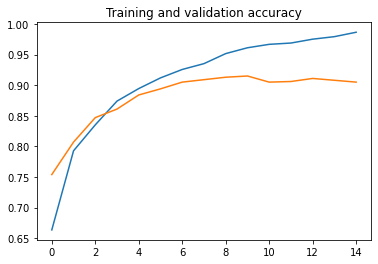

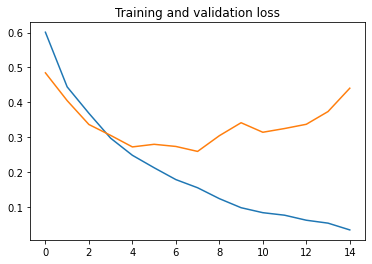

In [7]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [8]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_gen = test_datagen.flow_from_directory('dogs-vs-cats/test1', target_size=(300, 300), batch_size=32, class_mode='binary', shuffle=False)

Found 1000 images belonging to 2 classes.


In [11]:
model.evaluate(test_gen)

32/32 [==============================] - 3s 104ms/step - loss: 0.4646 - accuracy: 0.8980


[0.464635968208313, 0.8980000019073486]

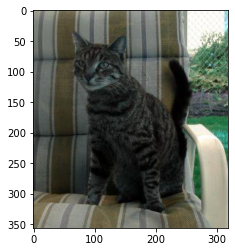

In [20]:
img = cv2.imread('dogs-vs-cats/test/3004.jpg')
plt.imshow(img)
reshape_img = cv2.resize(img, (300,300)) 
temp = np.array(reshape_img)
array_image = temp.reshape(1,300,300,-1)

In [21]:
prediction = model.predict([array_image])
print(prediction)
if prediction>0.5:
    print("It is a dog")
else:
    print("It is a cat")

[[0.]]
It is a cat


In [3]:

new_model = load_model('dogs_v_cats_model.h5')

In [4]:
test_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
predictions = new_model.predict(test_gen, verbose=0)

In [11]:
print(predictions)

[[2.58369781e-02]
 [4.51223649e-17]
 [1.06923829e-03]
 [3.86615192e-13]
 [1.08690010e-12]
 [2.51037487e-17]
 [9.25951123e-01]
 [3.40556373e-15]
 [8.91904687e-14]
 [9.99935150e-01]
 [1.18887565e-15]
 [1.13202312e-07]
 [2.59731174e-01]
 [4.41829543e-05]
 [2.15579629e-01]
 [7.38855646e-13]
 [1.62057988e-02]
 [4.34901733e-11]
 [4.67925587e-10]
 [6.87679509e-03]
 [8.10989942e-09]
 [4.43418563e-18]
 [2.73046197e-07]
 [5.33774964e-16]
 [9.73759949e-01]
 [1.53636711e-06]
 [8.96908760e-01]
 [2.83213259e-13]
 [2.88248812e-05]
 [9.99945164e-01]
 [2.90859112e-04]
 [1.34961571e-15]
 [8.22085724e-07]
 [5.15984695e-08]
 [7.97600210e-01]
 [3.94579372e-15]
 [2.59170740e-10]
 [1.88291160e-09]
 [2.83641217e-04]
 [1.16705030e-01]
 [1.66161262e-05]
 [6.01021975e-06]
 [9.89945114e-01]
 [3.75519758e-19]
 [2.39517823e-01]
 [4.03246820e-01]
 [1.07552779e-14]
 [4.14143614e-02]
 [5.36140949e-02]
 [1.60517732e-06]
 [2.06636237e-08]
 [2.03238986e-03]
 [6.32906239e-03]
 [3.02129592e-08]
 [4.63209158e-15]
 [2.312340

In [12]:
rounded_predictions = np.round(predictions)
print(rounded_predictions)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.

In [21]:
cm = confusion_matrix(test_gen.classes, rounded_predictions)

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
test_gen.class_indices

{'cats': 0, 'dogs': 1}

Confusion matrix, without normalization
[[448  66]
 [ 36 450]]


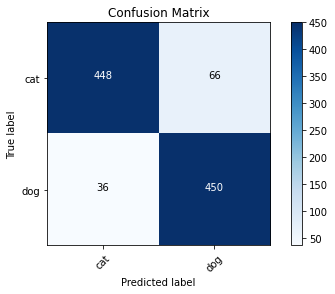

In [24]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [2]:
new_model = load_model('dogs_v_cats_model.h5')

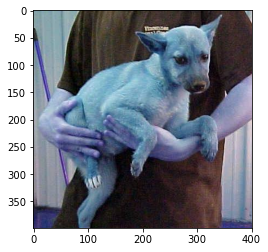

In [5]:
img = cv2.imread('dogs-vs-cats/test/2372.jpg')
plt.imshow(img)
reshape_img = cv2.resize(img, (300,300)) 
temp = np.array(reshape_img)
array_image = temp.reshape(1,300,300,-1)

In [6]:
prediction = new_model.predict([array_image])
print(prediction)
if prediction>0.5:
    print("It is a dog")
else:
    print("It is a cat")

[[1.]]
It is a dog
